In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
start_date = '2014-08-01'
end_date = '2014-08-07'
temps=calc_temps(start_date, end_date)
temps

[(71.0, 77.45652173913044, 83.0)]

In [11]:
avg_temp = temps
type(avg_temp)

list

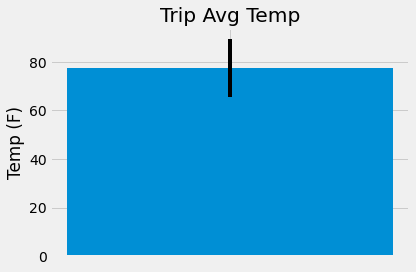

In [12]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x=[""]
avg_temp = temps[0][1]
error=temps[0][2]-temps[0][0]
plt.bar(x, avg_temp, yerr=error)
plt.ylabel("Temp (F)")

plt.title("Trip Avg Temp")
plt.tight_layout()
plt.show()


### Daily Rainfall Average

In [13]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date


'2014-08-01'

In [14]:
end_date

'2014-08-07'

In [15]:
prcp_prior_year = session.query(func.round(func.sum(Measurement.prcp),2),Station.station,Station.latitude,Station.longitude,Station.elevation).\
filter(Measurement.station == Station.station).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()

prcp_prior_year

[(1.32, 'USC00516128', 21.3331, -157.8025, 152.4),
 (0.42, 'USC00519281', 21.45167, -157.84888999999998, 32.9),
 (0.39, 'USC00514830', 21.5213, -157.8374, 7.0),
 (0.36, 'USC00519523', 21.33556, -157.71139, 19.5),
 (0.17, 'USC00513117', 21.4234, -157.8015, 14.6),
 (0.16, 'USC00519397', 21.2716, -157.8168, 3.0),
 (0.05, 'USC00511918', 21.3152, -157.9992, 0.9)]

In [16]:
"Daily Temperature Normals"


'Daily Temperature Normals'

In [17]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("08-08")

[(68.0, 76.5576923076923, 83.0)]

In [18]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date = '2017-08-01'
trip_end_date = '2017-08-07'

In [19]:
# Use the start and end date to create a range of dates

# Strip off the year and save a list of strings in the format %m-%d
# for date in 

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

sdate = dt.date(2017, 8, 1)   # start date
edate = dt.date(2017, 8, 7)   # end date
delta = edate - sdate       # as timedelta
delta

datetime.timedelta(days=6)

In [29]:
# create lists and do a for loop to collect dates and the corresponding temperature data
# using strftime to gather dates in a mm-dd format to feed to the daily_normals function

month_day_list = []
normals = []
trip_dates = []
trip_dates_mm_dd = []

for i in range(delta.days + 1):
    loop_date = sdate + dt.timedelta(days=i)  
    trip_dates.append(loop_date)
    trip_dates_mm_dd = loop_date.strftime("%m-%d")

    month=loop_date.month
    day=loop_date.day
    

    month_day_list.append(trip_dates_mm_dd)
    normals.append(daily_normals(trip_dates_mm_dd)[0])


In [21]:
trip_dates

[datetime.date(2017, 8, 1),
 datetime.date(2017, 8, 2),
 datetime.date(2017, 8, 3),
 datetime.date(2017, 8, 4),
 datetime.date(2017, 8, 5),
 datetime.date(2017, 8, 6),
 datetime.date(2017, 8, 7)]

In [22]:
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [23]:
month_day_list

['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']

In [24]:
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [25]:
df_trip_temps = pd.DataFrame(normals)
df_trip_temps

,0,1,2
0,67.0,75.540000,83.0
1,68.0,75.603774,84.0
2,70.0,76.611111,85.0
3,69.0,76.711538,84.0
4,69.0,76.148148,82.0
5,67.0,76.250000,83.0
6,71.0,77.156863,83.0


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_trip_temps["dates"]=trip_dates
df_trip_temps.rename(columns={0: "low", 1: "avg", 2: "high"},inplace=True)
df_trip_temps.set_index("dates", inplace=True)
df_trip_temps

,low,avg,high
dates,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


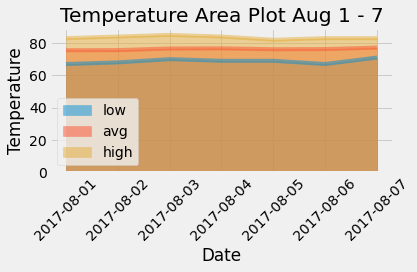

In [27]:
# Plot the daily normals as an area plot with `stacked=False`
df_trip_temps.plot.area(stacked=False, rot=45)
plt.ylabel("Temperature")
plt.xlabel("Date")

plt.title("Temperature Area Plot Aug 1 - 7")
plt.tight_layout()
plt.show()

## Close Session

In [28]:
# Close Session
session.close()